# Procedure to Run the Project
To run the project and generate association rules, follow these steps:  
1. **Clone or Download the Project Files:**  
First, clone the repository or download the project files to your local machine.  
Ensure that all necessary scripts and datasets are present in the project folder.  
`git clone https://github.com/avinanakarmi/CS634_FinalTermProject_ConfusionMatrix.git`
`cd CS634_MidTermProject_Apriori`
2. **Install the Required Libraries:**  
If you haven't installed the libraries listed in the prerequisites section, you can do so by running:  
`pip install -r requirements.txt`  
3. **Run the Project:**  
Open a terminal or command prompt in the project directory and run:  
`python nakarmi_avina_finaltermproj.py`  
6. **View Results:**  
Once the script finishes running, it will display the performance metrics for selected models.  
7. **Evaluate Performance:**  
The report analyses all relevant performance metrics given the property of dataset and recommends the best model.

# Objective
The objective of this project was to develop and evaluate three machine learning models—Random Forest, Decision Tree, and a 1D Convolutional Neural Network (CNN)—to classify data from a large, imbalanced dataset with high multicollinearity. The goal was to calculate and analyze a comprehensive set of performance metrics, including true positives (TP), true negatives (TN), false positives (FP), false negatives (FN), true positive rate (TPR), true negative rate (TNR), precision, negative predictive value (NPV), false positive rate (FPR), false discovery rate (FDR), false negative rate (FNR), accuracy (ACC), F1 score, error rate, balanced accuracy (BACC), true skill statistic (TSS), Heidke skill score (HSS), Brier score (BS), and area under the ROC curve (AUC). By comparing these metrics, the aim was to identify and recommend the best-performing model for accurately classifying the dataset. This evaluation considered both predictive performance and robustness to data imbalances and feature correlations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Exploration and Preprocessing

## Data Description

In [2]:
red_wine_data = pd.read_csv("./wine+quality/winequality-red.csv", sep=";")
white_wine_data = pd.read_csv("./wine+quality/winequality-white.csv", sep=";")
data = pd.concat([red_wine_data, white_wine_data])

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [3]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


## Data transformation
The project requires us to work with binary classification data, wehreas this data set has multiclass classification for the target attribute quality. To align with the project requirements a "recommended" attribute is derived from the "quality" attribute. If the quality of data item is higher than 6, the wine is recommended i.e, the recommended attribute has value 1.

In [4]:
data["recommendation"] = (data["quality"] > 6).astype('int32')
data = data.drop("quality", axis=1)

In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,recommendation
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,0


## Type of attibutes and null values

In [6]:
print("Dataframe shape", data.shape)
print()
print("Check type of data")
print(data.dtypes)
print()
print("Check for na")
print(data.isna().sum())

Dataframe shape (6497, 12)

Check type of data
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
recommendation            int32
dtype: object

Check for na
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
recommendation          0
dtype: int64


## Target Class Distribution
The dataset contains 19.7% positive classes (recommended = 1) and 80.3% negative classes (recommended = 0). While the imbalance is not extreme, the difference in target class distribution is significant, given that the dataset contains only 6,497 records.  
  
To address class imbalance, several strategies can be considered:  
  
1. **Data Augmentation:** Generate additional samples for the underrepresented class.  
2. **Stratified Splitting:** Ensure that both training and testing datasets are representative of the target class distribution.  
3. **Class Weight Adjustment:** Assign higher weights to the underrepresented class during model training.
  
Since the primary objective of the project was to evaluate model performance rather than directly addressing class imbalance, the dataset was not explicitly balanced. Instead, stratified k-fold cross-validation was employed to ensure that each fold in the cross-validation process contained a representative subset of the target class distribution. Additionally, for experimentation, class weights were adjusted for some selected models to account for the imbalance.

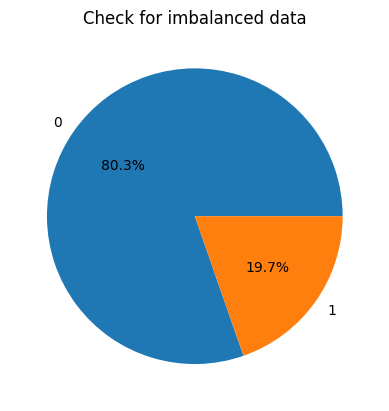

In [7]:
class_dist = data["recommendation"].value_counts().sort_index()
plt.pie(class_dist.values, labels=class_dist.index, autopct='%1.1f%%')

plt.title("Check for imbalanced data")

plt.show()

## Attribute collinearity Analysis
As suggested by the correlation matrix heatmap, there are moderate to strong positive and negative correlations between several pairs of features. (Fixed Acidity, Citric Acid), (Free Sulfur Dioxide, Total Sulfur Dioxide), and (Density, Residual Sugar) have high positive correlation. (Alcohol, Density), (Alcohol, Residual Sugar) and (Residual Sugar, pH) have high negative correlation. The high correlations indicate potential multicollinearity, which could affect model performance and interpretation.  

The Variance Inflation Factor (VIF) table quantifies the multicollinearity among features, with a VIF value above 10 typically indicating high multicollinearity. High VIF values of density, pH, alcohol, and fixed acidity suggest multicollinearity issues.  

Both the heatmap and VIF values indicate high multicollinearity among several features, especially Density, pH, and Alcohol. This may impact model interpretability and could lead to issues in certain machine learning models that are sensitive to multicollinearity.

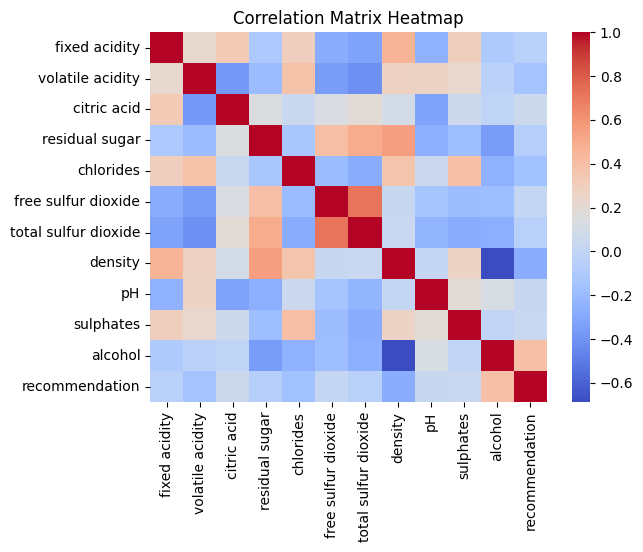

In [8]:
corr_matrix = data.corr(numeric_only = True)

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')

plt.show()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data.drop(columns=['recommendation'])

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 Feature         VIF
0          fixed acidity   58.897405
1       volatile acidity    8.943681
2            citric acid    9.340251
3         residual sugar    3.576148
4              chlorides    5.575434
5    free sulfur dioxide    8.452180
6   total sulfur dioxide   14.732237
7                density  936.984064
8                     pH  589.005172
9              sulphates   18.491253
10               alcohol  107.135452


# Model Selection
  
1. **RandomForest**:  Given the high Variance Inflation Factor (VIF) values for features like "density" and "pH," Random Forest can mitigate the risk of overfitting caused by correlated features by averaging across multiple decision trees. As indicated by the pie chart (80.3% for one class and 19.7% for the other), the dataset chosen for this project is imbalanced. Random Forest tends to be more resilient with imbalanced data when class weights are adjusted.  
2. **Decision Trees**: The correlation matrix shows that the features have a complex relationship. Decision Trees can capture non-linear relationships between features and the target class.  
3. **Conv1D**: Given the high VIF values, as the CNN can learn more robust representations of the data, minimizing multicollinearity's effects. CNNs can also be fine-tuned with techniques like class weights, which helps the model focus on minority classes.


## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# adjusting class weigths in this model
rf = RandomForestClassifier(class_weight="balanced")

def predict_with_random_forest(X_train, y_train, X_test):
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)
  y_prob = rf.predict_proba(X_test)
  return y_pred, y_prob[:,1]

## Decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
def predict_with_decision_tree(X_train, y_train, X_test):
  dt.fit(X_train, y_train)

  y_pred = dt.predict(X_test)
  y_prob = dt.predict_proba(X_test)
  return y_pred, y_prob[:,1]

## Conv1D

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

model = None
def predict_with_conv1d(X_train, y_train, X_test):
  global model

  # Calculate class weights based on the training labels
  class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
  class_weights = {i: weight for i, weight in enumerate(class_weights)}

  if model is None:
    model = Sequential()
    model.add(Input(shape= (X_train.shape[1], 1)))
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  # Fit the model with class weights
  history = model.fit(X_train.values, y_train.values, epochs=10, batch_size=32, verbose=0, class_weight=class_weights)
  y_pred = model.predict(X_test)
  return y_pred


# Util Functions

In [13]:
from typing import TypedDict

class Measures(TypedDict):
    tp: int
    tn: int
    fp: int
    fn: int
    tpr: float
    tnr: float
    precision: float
    npv: float
    fpr: float
    fdr: float
    fnr: float
    acc: float
    f1: float
    err_rate: float
    bacc: float
    tss: float
    hss: float
    bss: float
    auc: float

In [14]:
from sklearn.metrics import confusion_matrix

def get_classification_outcomes(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return tn, fp, fn, tp

In [15]:
def safe_divide(numerator, denominator):
    if denominator == 0:
      return 0
    else:
      return numerator / denominator

In [16]:
def find_auc(y_true, y_prob):
  df = pd.DataFrame({"actual": y_true, "probability": y_prob})
  df = df.sort_values(by="probability", ascending=True)
  TPR = []
  FPR = []
  for i in range(len(y_prob)):
    df["predicted"] = np.hstack([np.zeros(i), np.ones(len(y_prob) - i)])
    tp = sum((df["actual"] == 1) & (df["predicted"] == 1))
    fp = sum((df["actual"] == 0) & (df["predicted"] == 1))
    tn = sum((df["actual"] == 0) & (df["predicted"] == 0))
    fn = sum((df["actual"] == 1) & (df["predicted"] == 0))
    tpr = safe_divide(tp, (tp + fn))
    fpr = safe_divide(fp, (tn + fp))
    TPR.append(tpr)
    FPR.append(fpr)

  auc = np.abs(np.trapezoid(TPR, FPR))
  return auc

In [17]:
def calc_bss(y_true, bs):
  # BS_ref requires a reference model to compare the performance
  return 1 - safe_divide(bs, bs_ref)

In [18]:
from sklearn.metrics import brier_score_loss

def calculate_measures(y_true, y_pred, y_prob) -> Measures:
  measures = {}
  tn, fp, fn, tp = get_classification_outcomes(y_true, y_pred)
  p = tp + fn
  n = tn + fp
  measures['tp'] = tp
  measures['tn'] = tn
  measures['fp'] = fp
  measures['fn'] = fn
  measures['tpr'] = safe_divide(tp, p)
  measures['tnr'] = safe_divide(tn, n)
  measures['precision'] = safe_divide(tp, (fp + tp))
  measures['npv'] = safe_divide(tn, (tn + fn))
  measures['fpr'] = safe_divide(fp, n)
  measures['fdr'] = safe_divide(fp, (fp + tp))
  measures['fnr'] = safe_divide(fn, p)
  measures['acc'] = safe_divide((tp + tn), (p + n))
  measures['f1'] = safe_divide((2 * measures['precision'] * measures['tpr']), (measures['precision'] + measures['tpr']))
  measures['err_rate'] = safe_divide((fp + fn), (p + n))
  measures['bacc'] = (measures['tpr'] + measures['tnr']) / 2
  measures['tss'] = (safe_divide(tp, (fn + tp))) - (safe_divide(fp, (fp + tn)))
  measures['hss'] = safe_divide(2 * ((tp * tn) - (fp * fn)), ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)))

  measures['bs'] = brier_score_loss(y_true = y_true, y_proba = y_prob) 
  # measures['bss'] = calc_bss(y_true, measures['bs'])
  measures['auc'] = find_auc(y_true, y_prob)

  return Measures(measures)

In [19]:
#### Visualize measure in each fold
from typing import Dict, List

def viz_measures_k_fold(k, **kwargs: Measures):
  suffix = 'th'
  if k%10 == 1: suffix = 'st'
  elif k%10 == 2: suffix = 'nd'
  elif k%10 == 3: suffix = 'rd'
  print()
  print('Visualizing Model Performance', f'in {k}{suffix} fold:' if k > 0 else '')
  print(f"{'Measure':<13}", end='')
  for model in kwargs.keys():
    print(f'{model:<13}', end='')
  print()
  tup = next(iter(kwargs.items()))
  for measure in tup[1].keys():
    print(f'{measure:<13}', end='')
    for _, measures in kwargs.items():
      print(f'{measures[measure]:<13.2f}', end='')
    print()
  print()

def viz_measures_model(model, measures: List[Measures]):
  print()
  print('Visualizing ', model, 'Performance in Each Fold')
  print(f"{'Measure':<13}", end='')
  for fold in range(1, 11):
    print(f'{fold:<13}', end='')
  print()
  for measure in measures[0].keys():
    print(f'{measure:<13}', end='')
    for k_measures in measures:
      print(f'{k_measures[measure]:<13.2f}', end='')
    print()
  print()

# Train and test dataset preparation

In [20]:
from sklearn.model_selection import train_test_split

y = data["recommendation"]
X = data.drop("recommendation", axis=1)
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Metrics Calculation

In [21]:
from sklearn.model_selection import StratifiedKFold

rf_measures = []
dt_measures = []
conv1D_measures = []

### Ensures each fold has the same proportion of classes as the complete dataset.
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for idx, (train_index, test_index) in enumerate(kf.split(data_X_train, data_y_train), start = 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_pred, rf_prob = predict_with_random_forest(X_train, y_train, X_test)
    measures = calculate_measures(y_test, rf_pred, rf_prob)
    rf_measures.append(measures)


    dt_pred, dt_prob = predict_with_decision_tree(X_train, y_train, X_test)
    measures = calculate_measures(y_test, dt_pred, dt_prob)
    dt_measures.append(measures)

    conv1d_prob = predict_with_conv1d(X_train, y_train, X_test)
    conv1d_pred = (conv1d_prob > 0.5).astype(int)
    measures = calculate_measures(y_test, [item for row in conv1d_pred for item in row], conv1d_prob.flatten())
    conv1D_measures.append(measures)

    viz_measures_k_fold(idx, RandomForest = rf_measures[idx - 1], DecisionTree=dt_measures[idx - 1], Conv1D=conv1D_measures[idx - 1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Visualizing Model Performance in 1st fold:
Measure      RandomForest DecisionTree Conv1D       
tp           40.00        46.00        31.00        
tn           355.00       336.00       276.00       
fp           8.00         27.00        87.00        
fn           33.00        27.00        42.00        
tpr          0.55         0.63         0.42         
tnr          0.98         0.93         0.76         
precision    0.83         0.63         0.26         
npv          0.91         0.93         0.87         
fpr          0.02         0.07         0.24         
fdr          0.17         0.37         0.74         
fnr          0.45         0.37         0.58         
acc          0.91         0.88         0.70         
f1           0.66         0.63         0.32         
err_rate     0.09         0.12         0.30         
bacc         0.76         0.78         0.59         
tss          0.53         0.56         0.18         
hss          0.

In [22]:
viz_measures_model("Random Forest", rf_measures)


Visualizing  Random Forest Performance in Each Fold
Measure      1            2            3            4            5            6            7            8            9            10           
tp           40.00        47.00        40.00        48.00        37.00        47.00        45.00        51.00        45.00        36.00        
tn           355.00       354.00       351.00       337.00       363.00       349.00       342.00       341.00       339.00       356.00       
fp           8.00         5.00         10.00        12.00        8.00         10.00        9.00         3.00         10.00        9.00         
fn           33.00        30.00        34.00        38.00        27.00        29.00        39.00        40.00        41.00        34.00        
tpr          0.55         0.61         0.54         0.56         0.58         0.62         0.54         0.56         0.52         0.51         
tnr          0.98         0.99         0.97         0.97         0.98         0.97 

In [23]:
viz_measures_model("Decision Tree", dt_measures)


Visualizing  Decision Tree Performance in Each Fold
Measure      1            2            3            4            5            6            7            8            9            10           
tp           46.00        49.00        42.00        57.00        38.00        52.00        50.00        56.00        50.00        44.00        
tn           336.00       328.00       325.00       314.00       339.00       317.00       318.00       313.00       320.00       330.00       
fp           27.00        31.00        36.00        35.00        32.00        42.00        33.00        31.00        29.00        35.00        
fn           27.00        28.00        32.00        29.00        26.00        24.00        34.00        35.00        36.00        26.00        
tpr          0.63         0.64         0.57         0.66         0.59         0.68         0.60         0.62         0.58         0.63         
tnr          0.93         0.91         0.90         0.90         0.91         0.88 

In [24]:
viz_measures_model("Conv 1D", conv1D_measures)


Visualizing  Conv 1D Performance in Each Fold
Measure      1            2            3            4            5            6            7            8            9            10           
tp           31.00        49.00        50.00        69.00        26.00        64.00        75.00        88.00        78.00        59.00        
tn           276.00       274.00       276.00       254.00       332.00       236.00       243.00       179.00       185.00       271.00       
fp           87.00        85.00        85.00        95.00        39.00        123.00       108.00       165.00       164.00       94.00        
fn           42.00        28.00        24.00        17.00        38.00        12.00        9.00         3.00         8.00         11.00        
tpr          0.42         0.64         0.68         0.80         0.41         0.84         0.89         0.97         0.91         0.84         
tnr          0.76         0.76         0.76         0.73         0.89         0.66       

In [25]:
## Average measures
def calc_avg_measures(measures):
  fpr_values, tpr_values = [], []
  avg = {}
  metrics = measures[0].keys();
  for metric in metrics:
    for i in range(0, 10):
      avg[metric] = avg.get(metric, 0) + measures[i][metric]
      if metric == 'fpr':
        fpr_values.append(measures[i][metric])
      elif metric == 'tpr':
        tpr_values.append(measures[i][metric])
    avg[metric] = avg[metric] / 10
  return avg

viz_measures_k_fold(0, RandomForest = calc_avg_measures(rf_measures), DecisionTree=calc_avg_measures(dt_measures), Conv1D=calc_avg_measures(conv1D_measures))


Visualizing Model Performance 
Measure      RandomForest DecisionTree Conv1D       
tp           43.60        48.40        58.90        
tn           348.70       324.00       252.60       
fp           8.40         33.10        104.50       
fn           34.50        29.70        19.20        
tpr          0.56         0.62         0.74         
tnr          0.98         0.91         0.71         
precision    0.84         0.59         0.36         
npv          0.91         0.92         0.93         
fpr          0.02         0.09         0.29         
fdr          0.16         0.41         0.64         
fnr          0.44         0.38         0.26         
acc          0.90         0.86         0.72         
f1           0.67         0.61         0.48         
err_rate     0.10         0.14         0.28         
bacc         0.77         0.76         0.72         
tss          0.54         0.53         0.45         
hss          0.61         0.52         0.32         
bs           0

# Visualizing ROC and Evaluating AUC of models using Test Datasets

In [26]:
from sklearn.metrics import roc_curve, auc

def visualize_roc(y_test, y_pred, predictor):
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color="darkorange", label=f'Area: {roc_auc:.2f}')
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f'ROC Curve for {predictor} Predictions')
  plt.legend(loc="lower right")
  plt.show()

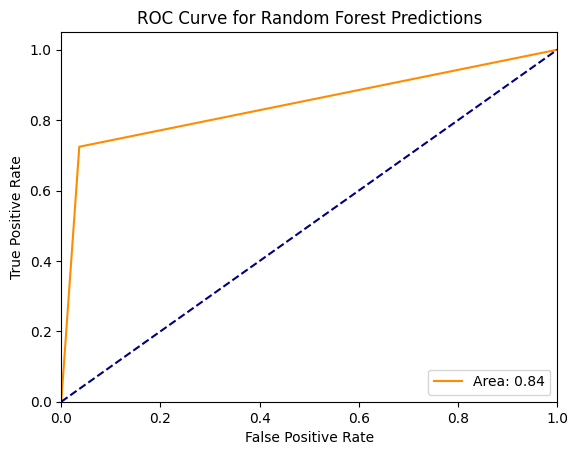

In [27]:
y_pred = rf.predict(data_X_test)
visualize_roc(data_y_test, y_pred, "Random Forest")

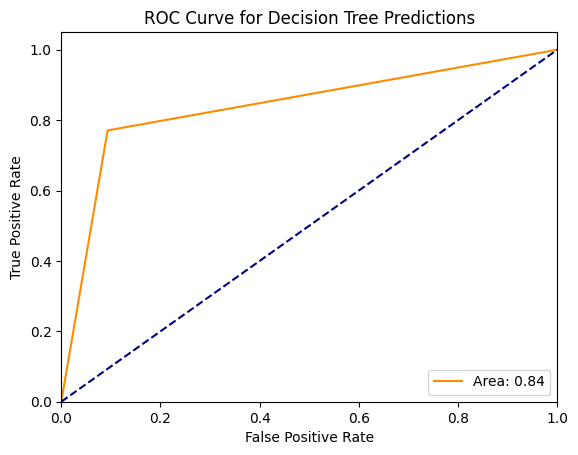

In [28]:
y_pred = dt.predict(data_X_test)
visualize_roc(data_y_test, y_pred, "Decision Tree")

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


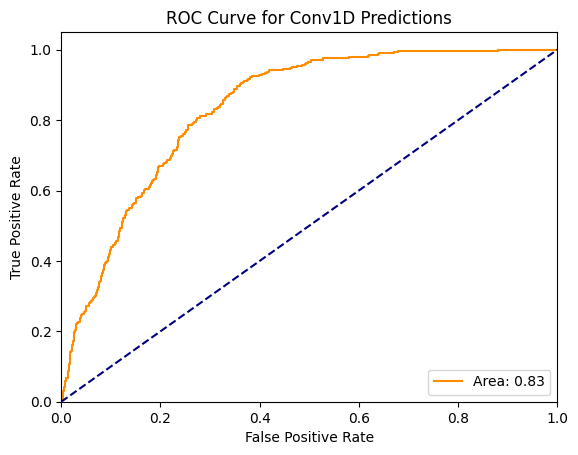

In [29]:
y_pred = model.predict(data_X_test)
visualize_roc(data_y_test, y_pred, "Conv1D")

# Evaluating Models
## Analysing models by individual performance metric

Metrics like accuracy, FPR, and FNR can be misleading because our dataset is imbalanced. However, metrics such as F1, AUC, and balanced accuracy provide more insight into the model's performance, especially for the minority class.
Multicollinearity can distort model coefficients and cause instability, potentially making precision, recall, and AUC less reliable and leading to higher error rates. Multicollinearity usually results in less interpretable models, which may affect the reliability of all metrics, particularly those dependent on feature weights or coefficients.  
  
- **False Positive (FP):** Random Forest had the lowest false positives (7.80), suggesting that it performs best in minimizing incorrect wine recommendations. This makes Random Forest preferable if minimizing false positives is a priority.  
  
- **True Negative Rate (TNR):** Random Forest had the highest TNR (0.98), indicating high reliability in identifying wines that should not be recommended. This metric is essential as it demonstrates the model’s strength in handling multicollinearity while accurately predicting negatives.  
  
- **Negative Predictive Value (NPV):** Although Decision Tree has a high NPV, Random Forest also performs well (0.91). Since class weights were adjusted, 1D ConvNet’s high NPV (0.94) could suggest it handles negative class predictions effectively in this dataset.  
  
- **False Discovery Rate (FDR):** Random Forest’s FDR (0.15) is the lowest among the models, suggesting it has the fewest incorrect positive predictions relative to total positive predictions. This reinforces Random Forest as a robust choice for minimizing false discoveries.  
  
- **F1-Score:** Random Forest had an F1-score of 0.67, which is better than Decision Tree (0.61) and Conv1D (0.49). The higher F1-score indicates that Random Forest maintains a good balance between precision and recall, which is beneficial for imbalanced datasets.  
  
- **Error Rate (Err Rate):** Random Forest had the lowest error rate (0.10), indicating fewer overall prediction errors compared to Decision Tree (0.14) and Conv1D (0.30). This further supports Random Forest's effectiveness in this dataset.  
  
- **Balanced Accuracy (BACC):** Both Random Forest and Decision Tree have similar balanced accuracy scores (0.77), showing they manage the trade-off between sensitivity and specificity. Although 1D ConvNet has a lower BACC, its performance could still be improved with further tuning.  
  
- **True Skill Statistic (TSS) and Heidke Skill Score (HSS):** Random Forest has slightly higher TSS (0.53) and HSS (0.62), indicating that it better captures the model's performance in correctly identifying positive and negative instances.  
  
- **Brier Score (BS):** Random Forest has the lowest Brier Score (0.07), which suggests that its predicted probabilities are closest to the actual outcomes.  
  
- **Area Under the Curve (AUC):** Random Forest has the highest AUC (0.93), demonstrating the best ability to distinguish between positive and negative classes. A high AUC is particularly valuable in this imbalanced dataset, as it indicates robust discriminatory power.

## Best model for the dataset
Based on these evaluations, Random Forest emerges as the best model for this dataset due to its overall superior performance across critical metrics, particularly in handling false positives, maintaining high true negative rate, and achieving high AUC and balanced accuracy. Random Forest's resilience to multicollinearity further solidifies its reliability.  
  
However, if interpretability is essential, Decision Tree may offer some advantages due to its simpler structure, despite lower performance metrics. Meanwhile, Conv1D could potentially be improved with further tuning but currently shows less favorable results for this dataset.